# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [12]:
import os
import sys
import hashlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')

## Task 1

Run the code below before you start working on your homework:


In [13]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [14]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [15]:
task2_data = pd.read_csv('../data/hw3-task2-data.csv')
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1], task2_data.iloc[:,2], test_size=0.25)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [17]:
model = KMeans(n_clusters=2, max_iter=400, random_state=42) # <- YOUR CODE GOES HERE
model.fit(Xtest) # <- YOUR CODE SHOULD REPLACE ?????
predictions = model.predict(Xtest)  # <- YOUR CODE GOES HERE

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [18]:
cm = confusion_matrix(Ytest, predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = accuracy_score(Ytest, predictions)
accuracy

0.3865546218487395

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

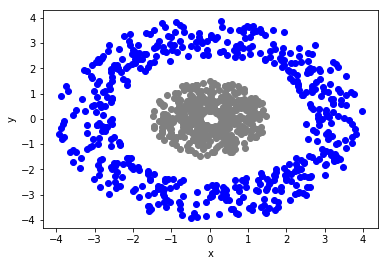

In [19]:
plt.scatter(task2_data.iloc[:500, 0], task2_data.iloc[:500, 1],color='blue')
plt.scatter(task2_data.iloc[500:950, 0], task2_data.iloc[500:950, 1],color='grey',)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

It doesn't work because of the cluster number we have given. The more we give a higher cluster number, the more our accuracy lowers. 


## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [21]:
model = KNeighborsClassifier(n_neighbors=90, metric='minkowski')
model.fit(Xtrain, Ytrain) # <- YOUR CODE SHOULD REPLACE ?????
predictions = model.predict(Xtest) # <- YOUR CODE GOES HERE

Now, construct the confusion matrix, and calculate your accuracy.

In [22]:
cm = confusion_matrix(Ytest, predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = accuracy_score(Ytest, predictions) # <- YOUR ACCURACY CODE GOES HERE
accuracy

0.8403361344537815

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below



## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [23]:
data = pd.read_excel('../data/BreastTissue.xlsx')
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25) # CODE GOES HERE

In [25]:
model = KNeighborsClassifier(n_neighbors = 9, metric='minkowski')
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)
accuracy = accuracy_score(Ytest, predicted)
print(cm)
print(accuracy)

[[3 0 1 0 0 0]
 [0 2 0 1 0 0]
 [0 3 0 0 1 0]
 [0 0 0 1 0 3]
 [0 0 0 1 2 3]
 [0 1 0 3 1 1]]
0.3333333333333333


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [26]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.fit_transform(xs) # your code goes here

Now, repeat model construction, training, testing and accuracy calculation

In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25)

In [28]:
model = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski')
model.fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)
accuracy = accuracy_score(Ytest, predicted)
print(cm)
print(accuracy)

[[4 0 1 0 0 0]
 [0 6 0 0 1 0]
 [0 0 2 1 0 1]
 [0 0 0 1 2 0]
 [0 0 0 1 4 0]
 [0 0 0 2 1 0]]
0.6296296296296297


Why did we get better results? Explain below:

### Your explanation goes below

KNN relies on majority voting based on class membership of K nearest samples for a given test data sample. The nearness of samples is typically based on Euclidean distance. 

Most of the times, the dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. 

Thus, the need for normalization of the data.

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [35]:
main_data = pd.read_excel('../data/BreastTissue.xlsx')
main_data.head(10)
xs = main_data.iloc[:,1:]
ys = main_data.iloc[:,0] 

In [36]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25)

In [37]:
#KMeans Model
model=KMeans(n_clusters=6, max_iter=300, random_state=42)
model.fit(Xtest)
predicted=model.predict(Xtest)

In [38]:
labels = { "car": 0 , "fad": 1, "mas": 2, "gla": 3, "con":4, "adi": 5}
real = Ytest.map(lambda x: labels[x])
cm=confusion_matrix(real,predicted)
accuracy=accuracy_score(real,predicted)
accuracy

0.18518518518518517

In [39]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.fit_transform(xs)

In [40]:
model = KMeans(n_clusters=6, max_iter=300, random_state=42)
model.fit (Xtest)
predicted = model.predict(Xtest)
labels = { "car": 0 , "fad": 1, "mas": 2, "gla": 3, "con":4, "adi": 5}
real = Ytest.map(lambda x: labels[x])
cm=confusion_matrix(real,predicted)
accuracy=accuracy_score(real,predicted)
accuracy

0.18518518518518517